<a href="https://colab.research.google.com/github/pnkcompany/Artificial_Intelligence/blob/main/hw2/19593_Priyanka_Muchandikar_Q2_2_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Required imports
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [66]:
# Build up hypothesis function/loss function/cost function based on your selected   decision function

# Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def BCE(X,y,theta):
    pred=sigmoid(np.dot(X,theta.T))
    mcost=-np.array(y)*np.array(np.log(pred))-np.array((1-y))*np.array(np.log(1-pred))
    
    return mcost.mean()

def grad_descent(X,y,theta,alpha):
    h=sigmoid(X.dot(theta.T))
    loss=h-y
    dj=(loss.T).dot(X)
    theta -= (alpha/(len(X))*dj)
    return theta

def logistic_reg(epoch,X,y,theta,alpha):
    for ep in range(epoch):
#         update theta 
        theta=grad_descent(X,y,theta,alpha)
        
#         calculate new loss
        if ((ep+1)%1000 == 0):
            loss=BCE(X,y,theta)
            print("Cost function ",loss)
    return theta




In [67]:
# Define function to plot decision boundary
def plot_decision_boundary(x,y,theta):
    x_0 = df[df.Y==0].iloc[:,0:2]
    y_0 = df[df.Y==0].iloc[:,2]
    x_1 = df[df.Y==1].iloc[:,0:2]
    y_1 = df[df.Y==0].iloc[:,2]

    slope = -(theta[0] / theta[2])
    intercept = -(theta[1] / theta[2])
    x = np.arange(x.shape[0], step=1)
    y = slope * x + intercept
    plt.scatter(x_0.iloc[:, 0], x_0.iloc[:, 1], marker = 'x')
    plt.scatter(x_1.iloc[:, 0], x_1.iloc[:, 1], marker = 'o')
    plt.plot(x, y, '-r')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Plotting the data with decision boundary')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

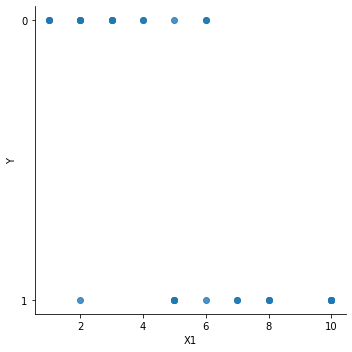

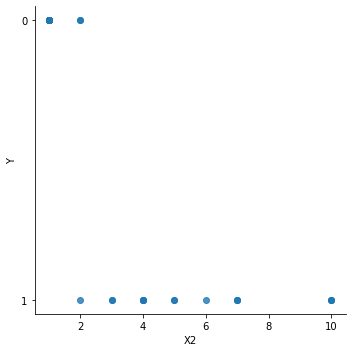

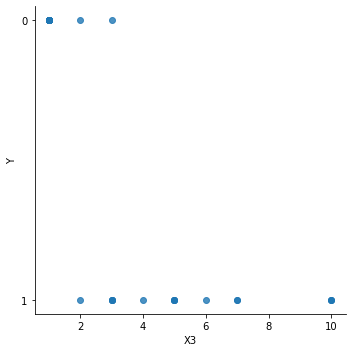

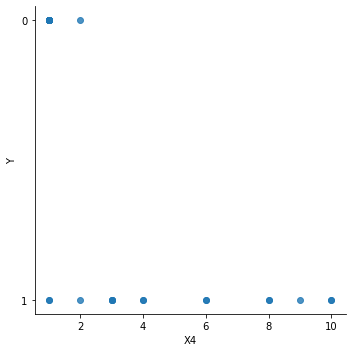

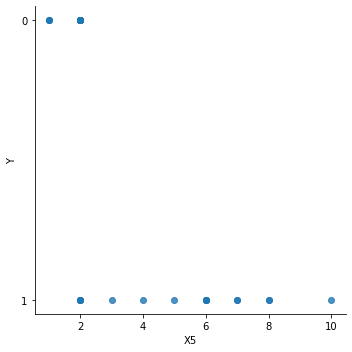

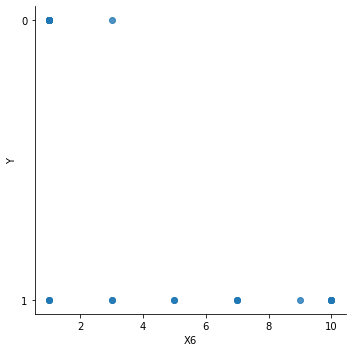

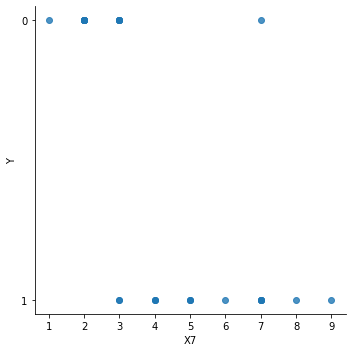

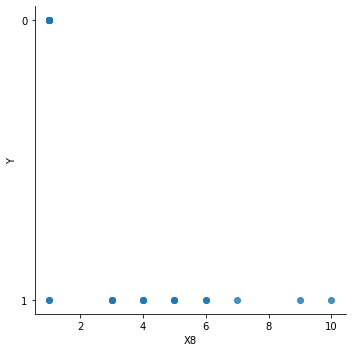

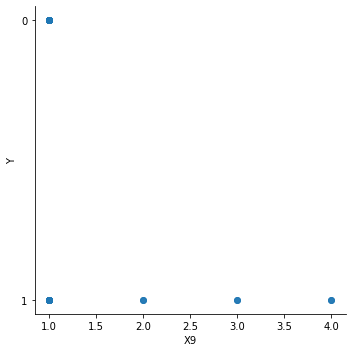

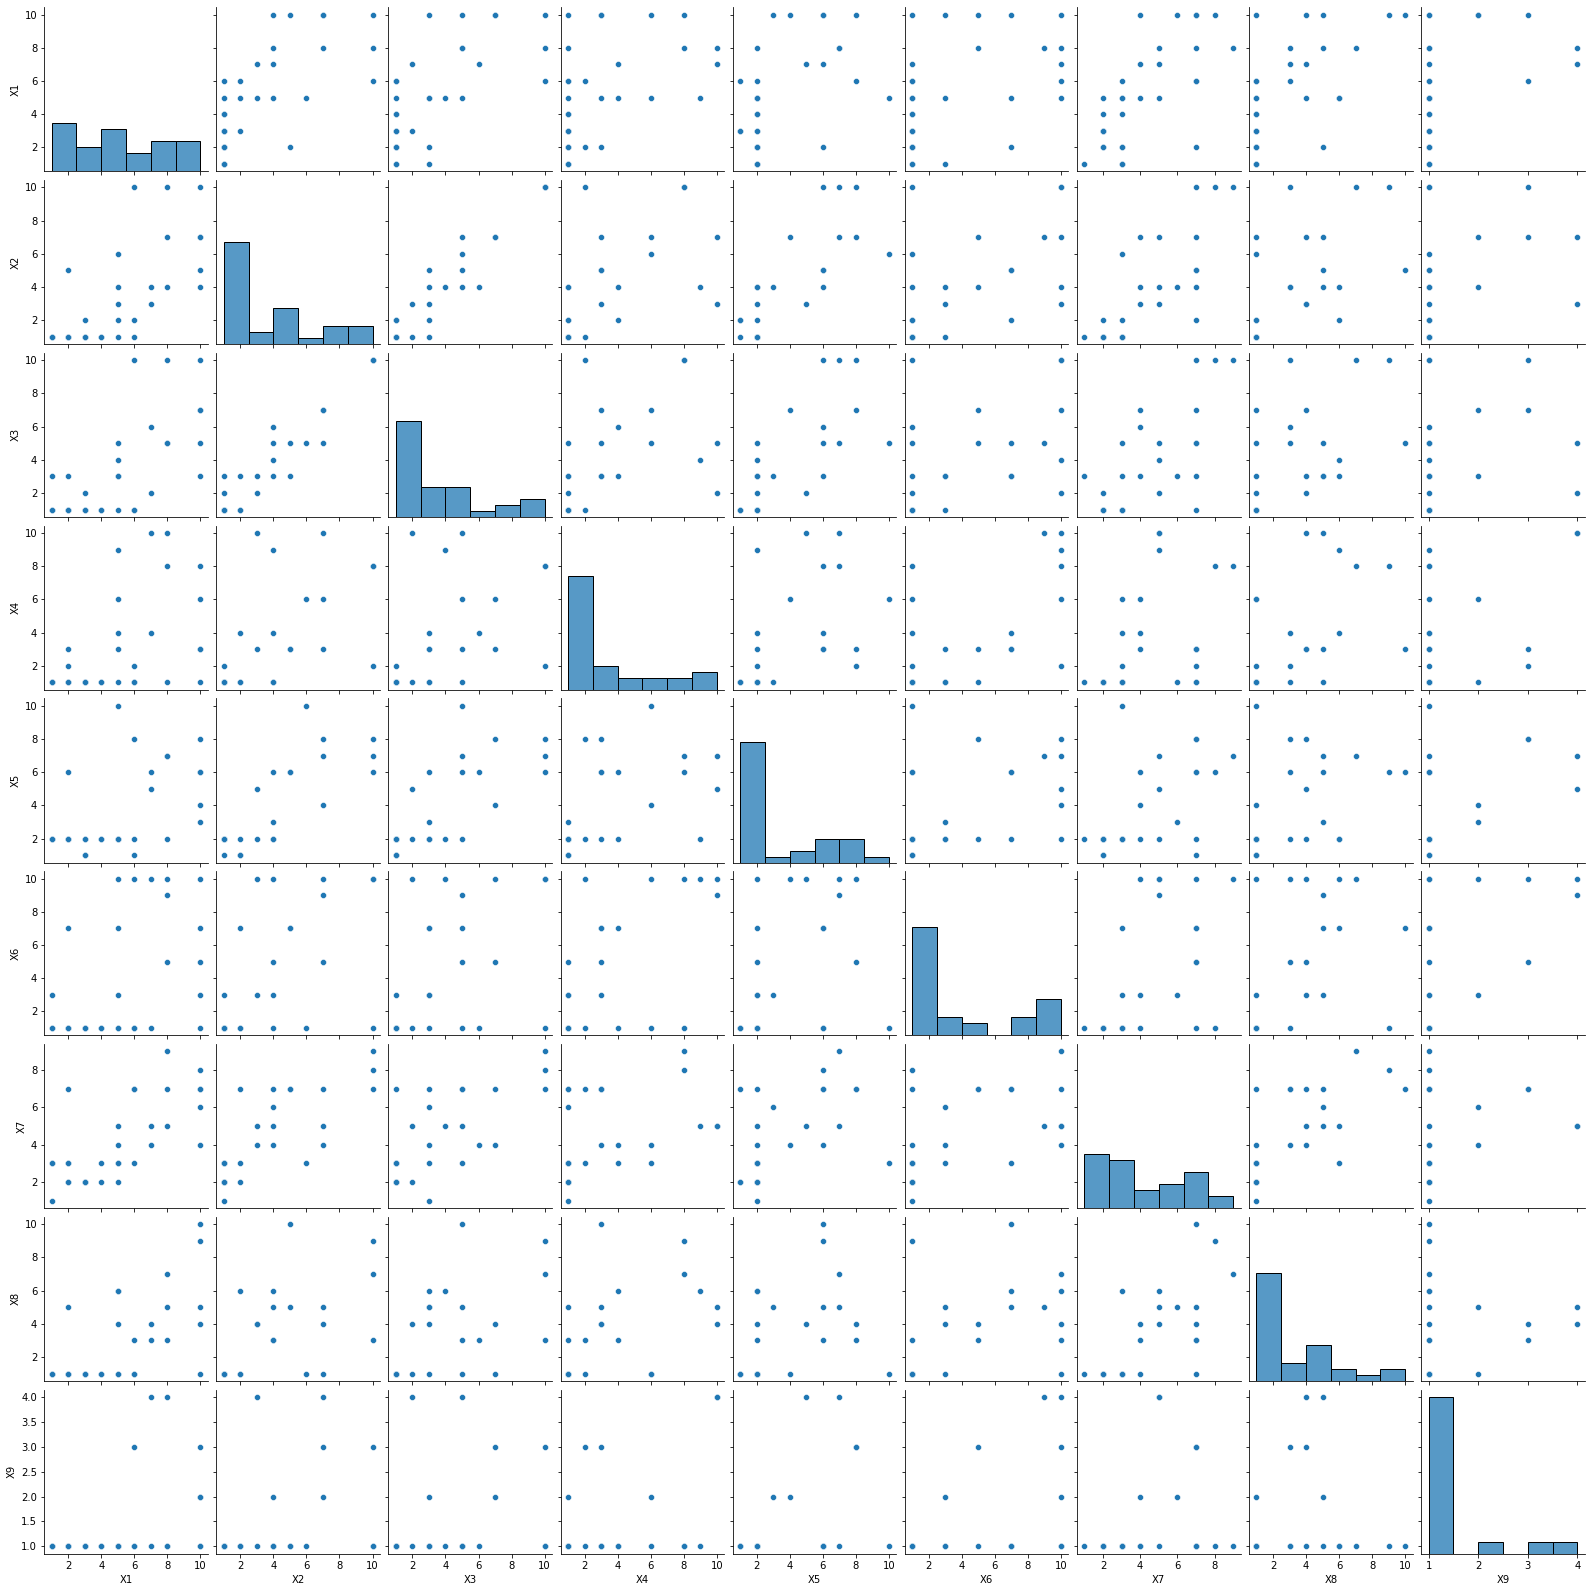

In [69]:
if __name__ == '__main__':
  #importing our cancer dataset
  df = pd.read_csv('data22.csv')
  #prepocess data
  for i in df.columns:
    df.loc[df[i]=='?',i]=np.nan
  
  X = df.iloc[:, 0:9].values
  Y = df.iloc[:, 9].values

  #splitting into train and test
  test_data = df[-2:]

  train_data = df[:-2]

  X_train = train_data[['X1','X2','X3','X4','X5','X6','X7','X8','X9']]
  y_train = train_data['Y'].astype('int')

  X_test = test_data[['X1','X2','X3','X4','X5','X6','X7','X8','X9']]
  
  # Split data to dependendt and independent variables
  x = df.iloc[:,0:2]
  y = df.iloc[:,2]

  # Convert dependent variable into numpy array
  y = y.values

  # Convert independent variables into numpy array
  x = x.values
  
  full_data=train_data.astype(float).values.tolist()
  train_data.head()

  for i in range(1,10):
    sns.lmplot(str('X'+str(i)), 'Y', data=train_data, fit_reg=False)

  sns.pairplot(train_data)

  

In [50]:
data=np.array(full_data)
mean=np.mean(data,axis=0)
std=np.std(data,axis=0) # standard deviation


In [51]:
X=(data - mean)/std
X

array([[ 0.98340899,  2.27118179,  2.33868327,  1.6877414 ,  1.41622652,
         1.80510421,  2.23560276,  1.62776996, -0.43759497,  1.        ],
       [-0.04275691, -0.13993063, -0.12077707, -0.02136382, -0.62518107,
        -0.18673492, -0.07211622,  0.44393726, -0.43759497,  1.        ],
       [-1.41097811, -0.82881989, -0.82348002, -0.7050059 , -0.62518107,
        -0.18673492, -0.53366001, -0.73989544, -0.43759497, -1.        ],
       [ 0.98340899,  1.23784789,  0.58192588,  2.37138348,  1.41622652,
         1.52055576,  0.38942758,  0.83854816,  3.06316482,  1.        ],
       [ 0.64135369,  0.204514  ,  0.93327736,  0.32045723,  1.007945  ,
        -0.75583181, -0.07211622,  0.04932636, -0.43759497,  1.        ],
       [-0.38481221, -0.82881989, -0.82348002, -0.7050059 , -0.62518107,
        -0.75583181, -0.99520381, -0.73989544, -0.43759497, -1.        ],
       [-0.38481221, -0.82881989, -0.82348002, -0.7050059 , -0.62518107,
        -0.75583181, -0.53366001, -0.73989544

In [52]:
cov_X=np.dot(X.T,X)
eig_val, eig_vec = np.linalg.eig(cov_X)
print(X.shape)
PC=np.dot(X,eig_vec)
PC

(32, 10)


array([[ 4.91509249e+00,  1.25903491e+00, -1.13254544e-01,
        -9.54145608e-01,  8.56297756e-01, -9.63286294e-02,
        -4.51661892e-01,  8.54148916e-02, -4.52507123e-01,
        -8.49298402e-01],
       [ 9.92991793e-03,  5.18165603e-01, -7.51252284e-01,
        -1.00917492e-01, -2.41984528e-01,  1.37755820e-01,
         7.20656837e-01,  1.26530277e-01, -8.21432525e-02,
         6.27015586e-01],
       [-2.34030439e+00, -2.60783769e-01, -9.39814086e-02,
        -3.60831165e-01,  7.31408001e-01, -5.21346305e-02,
        -6.23965560e-02,  9.57156933e-03,  2.43508289e-01,
        -1.31840323e-01],
       [ 3.97093561e+00, -2.69891450e+00, -4.53806478e-02,
        -7.50548049e-03, -6.37613572e-01,  1.85806387e-01,
         5.85098151e-02, -3.09681584e-01,  3.83085445e-01,
        -5.24690859e-01],
       [ 1.03381561e+00,  7.45348096e-01,  8.99439048e-01,
        -4.09095985e-01, -9.56633954e-01, -3.95978225e-01,
         2.54848160e-01,  2.72686525e-01, -1.67624271e-01,
         6.

In [53]:
full_data[0]


[8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 1.0]

In [54]:
full_data=np.matrix(full_data)
epoch=150000
alpha=0.001
x0=np.ones((full_data.shape[0],1))

data=np.concatenate((x0,full_data),axis=1)
print(data.shape)

theta=np.zeros((1,data.shape[1]-1))
print(theta.shape)
print(theta)

(32, 11)
(1, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
test_size=0.2
X_train=data[:-int(test_size*len(full_data)),:-1]
Y_train=data[:-int(test_size*len(full_data)),-1]
X_test=data[-int(test_size*len(full_data)):,:-1]
Y_test=data[-int(test_size*len(full_data)):,-1]

In [63]:
theta

array([[-3.8317918 ,  0.18851232,  1.59813593,  0.77235053,  0.71270878,
        -0.75103177,  0.97282664, -1.19506767,  0.91750887, -2.43809181]])

In [64]:
theta=logistic_reg(epoch,X_train,Y_train,theta,alpha)


Cost function  0.016223999390142973
Cost function  0.016120653044540384
Cost function  0.016018603166076544
Cost function  0.01591782562877186
Cost function  0.015818296899981456
Cost function  0.015719994022293994
Cost function  0.01562289459608887
Cost function  0.015526976762723096
Cost function  0.015432219188322525
Cost function  0.015338601048151882
Cost function  0.015246102011539543
Cost function  0.015154702227334229
Cost function  0.01506438230987239
Cost function  0.014975123325434388
Cost function  0.014886906779171028
Cost function  0.01479971460248043
Cost function  0.014713529140818252
Cost function  0.014628333141922455
Cost function  0.014544109744438658
Cost function  0.014460842466927677
Cost function  0.014378515197242567
Cost function  0.014297112182258665
Cost function  0.014216618017945425
Cost function  0.014137017639764668
Cost function  0.014058296313384039
Cost function  0.013980439625693269
Cost function  0.013903433476111794
Cost function  0.013827264068177

In [72]:
print(BCE(X_train,Y_train,theta))
print(BCE(X_test,Y_test,theta))

0.008274391129298977
0.060587498822476715
